# 投影峰谷查找

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
src = cv2.imread('../datas/f2.jpg')
rgb = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)

In [33]:
def find_peak(src):
    rows,cols = src.shape[0],src.shape[1]
    res = src.copy()
    thresh = 100
    max_val = 255
    _,src_thresh = cv2.threshold(src,thresh,max_val,cv2.THRESH_BINARY)
    # 注意保持数据类型一致
    srcf = src_thresh.astype(np.float32)
    vec = cv2.reduce(srcf,0, cv2.REDUCE_SUM, dtype=cv2.CV_32FC1)
    tempvec = np.zeros_like(vec)
    # 遍历求差分符号函数
    for i in range(vec.shape[0]):
        for j in range(1,vec.shape[1]-1):
            if vec[i,j + 1] - vec[i,j] > 0:
                tempvec[i,j] = 1
            elif tempvec[i,j + 1] - vec[i,j] < 0:
                tempvec[i,j] = -1
            else:
                tempvec[i,j] = 0
    # 对符号函数遍历
    for i in range(tempvec.shape[0]):
        for j in range(tempvec.shape[1] - 1,0,-1):
            if tempvec[i,j] == 0 and j == tempvec.shape[1] - 1:
                tempvec[i,j] = 1
            elif tempvec[i,j] == 0:
                if tempvec[i,j + 1] >= 0:
                    tempvec[i,j] = 1
                else:
                    tempvec[i,j] = -1
    # 波峰判断输出
    resultvec = []
    for i in range(tempvec.shape[0]):
        for j in range(tempvec.shape[1]-1):
            if tempvec[i,j+1] - tempvec[i,j] == -2:
                resultvec.append(j+1)
    # 输出波峰位置
    for i in range(len(resultvec)):
        for ii in range(rows):
            res[ii,resultvec[i]] = 255
    return res

In [36]:
def calcAndDrawHist(image, color):    
    hist= cv2.calcHist([image], [0], None, [256], [0.0,255.0])    
    minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(hist)    
    histImg = np.zeros([256,256,3], np.uint8)    
    hpt = int(0.9* 256);    
        
    for h in range(256):    
        intensity = int(hist[h]*hpt/maxVal)    
        cv2.line(histImg,(h,256), (h,256-intensity), color)    
            
    return histImg; 

In [37]:
dst = find_peak(gray)
hist = calcAndDrawHist(gray,(255,0,0))

Text(0.5,1,'Histogram')

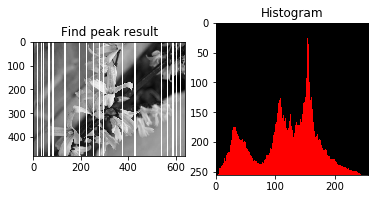

In [38]:
plt.subplot(121)
plt.imshow(dst,'gray')
plt.title('Find peak result')
plt.subplot(122)
plt.imshow(hist)
plt.title('Histogram')